## Story - 4 : How much do we get paid?
I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

In [28]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
ds = pd.read_csv('https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/Job%20listing_Glassdoor.csv')

In [30]:
ds.head()

,Location,rating,Job_title,Place,salary,post_date,Job_description
0,United States,4.1,Cloud Software & Data Engineer,"Houston, TX",USD 105K - 148K (Glassdoor est.),3d,Job Description\n\nA Cloud Software & Data Eng...
1,United States,NaN,IT Business Analyst - Reston Virginia (not rem...,"Reston, VA",USD 95K - 120K (Employer est.),24h,IT Business Analyst\n\nJOB SUMMARY\n\nThe IT B...
2,United States,3.5,Data Engineer,Michigan,NaN,8d,NaN
3,United States,4.9,Junior Business Analyst,"Omaha, NE",USD 55K - 66K (Employer est.),24h,MUST HAVE: LOOKING FOR A STRONG BUSINESS ANALY...
4,United States,3.2,Banking Business Analyst,"Atlanta, GA",USD 66K - 91K (Glassdoor est.),24h,Infosys is seeking Banking Business Analyst wi...


In [31]:
ds.columns

Index(['Location', 'rating', 'Job_title', 'Place', 'salary', 'post_date',
       'Job_description'],
      dtype='object')

In [32]:
ds.dtypes

Location            object
rating             float64
Job_title           object
Place               object
salary              object
post_date           object
Job_description     object
dtype: object

# Data Wrangling

In [33]:
ds.isnull().sum()

Location             5
rating             366
Job_title            5
Place                6
salary             449
post_date            5
Job_description    118
dtype: int64

In [34]:
ds = ds[ds['salary'].isnull()==0]

In [35]:
ds['hourly'] = ds['salary'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)

In [36]:
ds.hourly

0       0
1       0
3       0
4       0
5       1
       ..
3544    0
3545    0
3546    0
3547    0
3548    0
Name: hourly, Length: 3100, dtype: int64

In [37]:
employee_salary = ds['salary'].apply(lambda x: x.split('(')[0]).str.replace('K','').str.replace('USD','')
employee_salary

0                     105 - 148 
1                      95 - 120 
3                       55 - 66 
4                       66 - 91 
5        25.00 - 27.00 Per Hour 
                  ...           
3544                  111 - 142 
3545                   85 - 105 
3546                  175 - 225 
3547                    54 - 81 
3548                  101 - 132 
Name: salary, Length: 3100, dtype: object

In [38]:
ds['min_hr'] = employee_salary.apply(lambda x: x.lower().replace('per hour',''))
ds.min_hr

0             105 - 148 
1              95 - 120 
3               55 - 66 
4               66 - 91 
5        25.00 - 27.00  
              ...       
3544          111 - 142 
3545           85 - 105 
3546          175 - 225 
3547            54 - 81 
3548          101 - 132 
Name: min_hr, Length: 3100, dtype: object

In [39]:
ds['salary_limit'] = ds['min_hr'].apply(lambda x: x.split("-"))
ds['limit_count'] = ds['salary_limit'].apply(len)

In [40]:
ds.head()

,Location,rating,Job_title,Place,salary,post_date,Job_description,hourly,min_hr,salary_limit,limit_count
0,United States,4.1,Cloud Software & Data Engineer,"Houston, TX",USD 105K - 148K (Glassdoor est.),3d,Job Description\n\nA Cloud Software & Data Eng...,0,105 - 148,"[ 105 , 148 ]",2
1,United States,NaN,IT Business Analyst - Reston Virginia (not rem...,"Reston, VA",USD 95K - 120K (Employer est.),24h,IT Business Analyst\n\nJOB SUMMARY\n\nThe IT B...,0,95 - 120,"[ 95 , 120 ]",2
3,United States,4.9,Junior Business Analyst,"Omaha, NE",USD 55K - 66K (Employer est.),24h,MUST HAVE: LOOKING FOR A STRONG BUSINESS ANALY...,0,55 - 66,"[ 55 , 66 ]",2
4,United States,3.2,Banking Business Analyst,"Atlanta, GA",USD 66K - 91K (Glassdoor est.),24h,Infosys is seeking Banking Business Analyst wi...,0,66 - 91,"[ 66 , 91 ]",2
5,United States,4.0,Junior Business Analyst,"Ashburn, VA",USD 25.00 - 27.00 Per Hour (Employer est.),24h,Job description:\n\nPerform requirement elicit...,1,25.00 - 27.00,"[ 25.00 , 27.00 ]",2


# Extracting Minimum and Maximum Salary

In [41]:
ds['min_salary'] = ds.apply(lambda x: float(x.min_hr.split('-')[0]) if x.limit_count ==2 else x.salary_limit[0],axis=1).astype(float)
ds['max_salary'] = ds.apply(lambda x: float(x.min_hr.split('-')[1]) if x.limit_count ==2 else x.salary_limit[0],axis=1).astype(float)
ds['min_salary'] = ds.apply(lambda x: x.min_salary*2 if x.hourly ==1 and  x.limit_count ==2 else x.min_salary, axis =1)
ds['max_salary'] = ds.apply(lambda x: x.max_salary*2 if x.hourly ==1 and  x.limit_count ==2 else x.max_salary, axis =1)

ds['average_salary'] = (ds.min_salary+ds.max_salary)/2

In [42]:
ds.head()

,Location,rating,Job_title,Place,salary,post_date,Job_description,hourly,min_hr,salary_limit,limit_count,min_salary,max_salary,average_salary
0,United States,4.1,Cloud Software & Data Engineer,"Houston, TX",USD 105K - 148K (Glassdoor est.),3d,Job Description\n\nA Cloud Software & Data Eng...,0,105 - 148,"[ 105 , 148 ]",2,105.0,148.0,126.5
1,United States,NaN,IT Business Analyst - Reston Virginia (not rem...,"Reston, VA",USD 95K - 120K (Employer est.),24h,IT Business Analyst\n\nJOB SUMMARY\n\nThe IT B...,0,95 - 120,"[ 95 , 120 ]",2,95.0,120.0,107.5
3,United States,4.9,Junior Business Analyst,"Omaha, NE",USD 55K - 66K (Employer est.),24h,MUST HAVE: LOOKING FOR A STRONG BUSINESS ANALY...,0,55 - 66,"[ 55 , 66 ]",2,55.0,66.0,60.5
4,United States,3.2,Banking Business Analyst,"Atlanta, GA",USD 66K - 91K (Glassdoor est.),24h,Infosys is seeking Banking Business Analyst wi...,0,66 - 91,"[ 66 , 91 ]",2,66.0,91.0,78.5
5,United States,4.0,Junior Business Analyst,"Ashburn, VA",USD 25.00 - 27.00 Per Hour (Employer est.),24h,Job description:\n\nPerform requirement elicit...,1,25.00 - 27.00,"[ 25.00 , 27.00 ]",2,50.0,54.0,52.0


# Place of Job

In [43]:
ds.columns

Index(['Location', 'rating', 'Job_title', 'Place', 'salary', 'post_date',
       'Job_description', 'hourly', 'min_hr', 'salary_limit', 'limit_count',
       'min_salary', 'max_salary', 'average_salary'],
      dtype='object')

In [44]:
ds['Place'] = ds['Place'].astype(str)
ds['place_var'] = ds['Place'].apply(lambda x: x.split(','))
ds['place_limit'] = ds['place_var'].apply(len)
ds['place_limit']

0       2
1       2
3       2
4       2
5       2
       ..
3544    2
3545    2
3546    2
3547    2
3548    2
Name: place_limit, Length: 3100, dtype: int64

In [45]:
ds['State'] = ds.apply(lambda x: x.Place.split(',')[1] if x.place_limit ==2 else x.Place[0:],axis=1)
ds['City'] = ds.apply(lambda x: x.Place.split(',')[0], axis=1) #if x.place_limit ==2 else x.Place[0],axis=1)
ds = ds[(ds['Place'] !='United States') & (ds['Place'] !='nan')]


In [46]:
ds['City'].head()

0    Houston
1     Reston
3      Omaha
4    Atlanta
5    Ashburn
Name: City, dtype: object

In [47]:
ds[ds.Place== 'nan']

,Location,rating,Job_title,Place,salary,post_date,Job_description,hourly,min_hr,salary_limit,limit_count,min_salary,max_salary,average_salary,place_var,place_limit,State,City


# Function to Correct State Codes In some States

In [48]:
def state_code(codes):
  if 'pennsylvania' in codes.lower():
        return 'PA'
  elif 'minnesota' in codes.lower():
    return 'MN'
  elif 'maryland' in codes.lower():
    return 'MD'
  elif 'alabama' in codes.lower():
    return 'AL'
  elif  'california' in codes.lower():
    return 'CA'
  elif 'new york state' in codes.lower():
        return 'NY'
  elif 'arizona' in codes.lower():
    return 'AZ'
  elif 'ridgefield park, bergen, nj' in codes.lower():
    return 'NJ'
  elif 'kansas' in codes.lower():
    return 'KS'
  elif  'indiana' in codes.lower():
    return 'IN'
  elif 'new jersey' in codes.lower():
        return 'NJ'
  elif 'massachusetts' in codes.lower():
    return 'MA'
  elif 'michigan' in codes.lower():
    return 'MI'
  elif 'dallas-fort worth' in codes.lower():
    return 'TX'
  elif  'georgia' in codes.lower():
    return 'GA'
  elif 'north carolina' in codes.lower():
        return 'NC'
  elif 'colonial park, dauphin, pa' in codes.lower():
    return 'PA'
  elif 'manhattan' in codes.lower():
    return 'NY'
  elif 'wisconsin' in codes.lower():
    return 'WI'
  elif  'iowa' in codes.lower():
    return 'IA'
  elif 'connecticut' in codes.lower():
    return 'NJ'
  elif 'st. james' in codes.lower():
    return 'NY'
  elif  'colorado' in codes.lower():
    return 'CO'
  elif  'ohio' in codes.lower():
    return 'OH'
  elif  'remote' in codes.lower():
    return 'Remote Location'


In [49]:
ds['Place_vars'] = ds.apply(lambda x: x.Place.split(','),axis=1)
#ds.head()

In [50]:
ds['Place_count'] = ds['Place_vars'].apply(len)
ds['State'] = ds.apply(lambda x: state_code(x['City']) if x.Place_count <2 else x.State,axis=1)

In [51]:
ds['State'] = ds['State'].str.replace('Ridgefield Park, Bergen, NJ', 'NJ')
ds['State'] = ds['State'].str.replace('Colonial Park, Dauphin, PA', 'PA')

# Rating

In [52]:
ds['rating'].value_counts()

3.9    291
3.8    256
3.7    255
4.0    225
4.2    218
3.6    211
4.1    200
3.4    162
3.5    124
4.3    113
3.3     77
3.2     70
4.4     64
3.1     61
4.5     57
5.0     39
4.6     38
4.7     31
3.0     29
2.9     26
2.8     22
4.8     18
4.9     15
2.7     13
2.6     12
2.5      8
2.4      7
2.1      5
2.0      3
1.7      3
1.0      3
2.3      2
1.5      2
1.9      1
Name: rating, dtype: int64

<Axes: >

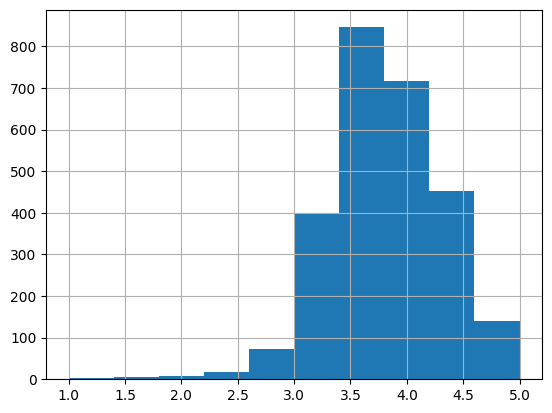

In [53]:
ds['rating'].hist()

# User Defined Functions

In [54]:
def job_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'business analyst' in title.lower():
        return 'business analyst'
    elif 'statistician' in title.lower():
      return 'statistician'

    else:
        return 'others'

In [55]:
ds['Title'] = ds['Job_title'].apply(job_title)

In [56]:
ds['Title'].value_counts()

analyst           1563
others             549
data engineer      395
data scientist     165
manager            111
mle                103
director            42
statistician        22
Name: Title, dtype: int64

In [57]:
def rank(rnk):
    if 'sr' in rnk.lower() or 'senior' in rnk.lower() or 'sr' in rnk.lower() or 'lead' in rnk.lower() or 'principal' in rnk.lower():
            return 'senior'
    elif 'jr' in rnk.lower() or 'jr.' in rnk.lower():
        return 'jr'
    else:
        return 'na'

In [58]:
ds['Rank'] = ds['Job_title'].apply(rank)

In [59]:
ds['Rank'].value_counts()

na        2111
senior     830
jr           9
Name: Rank, dtype: int64

In [60]:
ds['Job_Type'] = ds['Place'].apply(lambda x: 'Remote job' if 'remote' in x.lower() else 'Others')

In [61]:
ds['Job_Type']

0       Others
1       Others
3       Others
4       Others
5       Others
         ...  
3544    Others
3545    Others
3546    Others
3547    Others
3548    Others
Name: Job_Type, Length: 2950, dtype: object

In [62]:
ds['Job_description'] = ds['Job_description'].astype(str)

In [63]:
#  Job description length
ds['desc_len'] = ds['Job_description'].apply(lambda x: len(x))
ds['desc_len'].head(10)

0     11563
1      9047
3      1405
4      3332
5      1458
6      5016
7      4470
8      1086
9      3340
11     2731
Name: desc_len, dtype: int64

# Search For Tools/Skill Set in Job Description

In [64]:
#python
ds['python'] = ds['Job_description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
ds.python.value_counts()

0    2041
1     909
Name: python, dtype: int64

In [65]:
# SQL
ds['SQL'] = ds['Job_description'].apply(lambda x: 1 if 'sql' in x.lower() or 'sequel' in x.lower() else 0)
ds.SQL.value_counts()

0    1824
1    1126
Name: SQL, dtype: int64

In [66]:
# SAS
ds['SAS'] = ds['Job_description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)
ds.SAS.value_counts()

0    2706
1     244
Name: SAS, dtype: int64

In [67]:
# MATLAB
ds['MATLAB'] = ds['Job_description'].apply(lambda x: 1 if 'matlab' in x.lower() else 0)
ds.MATLAB.value_counts()

0    2911
1      39
Name: MATLAB, dtype: int64

In [68]:
# Power BI
ds['Power_BI'] = ds['Job_description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)
ds.Power_BI.value_counts()

0    2605
1     345
Name: Power_BI, dtype: int64

In [69]:
# DataRobot
ds['DataRobot'] = ds['Job_description'].apply(lambda x: 1 if 'datarobot' in x.lower() else 0)
ds.DataRobot.value_counts()

0    2950
Name: DataRobot, dtype: int64

In [70]:
# MongoDB
ds['MongoDB'] = ds['Job_description'].apply(lambda x: 1 if 'mongodb' in x.lower() else 0)
ds.MongoDB.value_counts()

0    2915
1      35
Name: MongoDB, dtype: int64

In [71]:
# Tableau
ds['Tableau'] = ds['Job_description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
ds.Tableau.value_counts()

0    2540
1     410
Name: Tableau, dtype: int64

In [72]:
# Alteryx
ds['Alteryx'] = ds['Job_description'].apply(lambda x: 1 if 'alteryx' in x.lower() else 0)
ds.Alteryx.value_counts()

0    2914
1      36
Name: Alteryx, dtype: int64

In [73]:
# NLTK
ds['NLTK'] = ds['Job_description'].apply(lambda x: 1 if 'nltk' in x.lower() else 0)
ds.NLTK.value_counts()

0    2950
Name: NLTK, dtype: int64

In [74]:
# KNIME
ds['KNIME'] = ds['Job_description'].apply(lambda x: 1 if 'knime' in x.lower() else 0)
ds.KNIME.value_counts()

0    2949
1       1
Name: KNIME, dtype: int64

In [75]:
# SPSS
ds['SPSS'] = ds['Job_description'].apply(lambda x: 1 if 'spss' in x.lower() else 0)
ds.SPSS.value_counts()

0    2924
1      26
Name: SPSS, dtype: int64

In [76]:
# JULIA
ds['JULIA'] = ds['Job_description'].apply(lambda x: 1 if 'julia' in x.lower() else 0)
ds.JULIA.value_counts()

0    2947
1       3
Name: JULIA, dtype: int64

In [77]:
# BigML
ds['BigML'] = ds['Job_description'].apply(lambda x: 1 if 'bigml' in x.lower() else 0)
ds.BigML.value_counts()

0    2950
Name: BigML, dtype: int64

In [78]:
#r studio
ds['R_tool'] = ds['Job_description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
ds.R_tool.value_counts()



0    2945
1       5
Name: R_tool, dtype: int64

In [79]:
#excel
ds['excel'] = ds['Job_description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
ds.excel.value_counts()

1    1720
0    1230
Name: excel, dtype: int64

In [80]:
#spark
ds['spark'] = ds['Job_description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
ds.spark.value_counts()

0    2652
1     298
Name: spark, dtype: int64

In [81]:
#aws
ds['aws'] = ds['Job_description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
ds.aws.value_counts()



0    2188
1     762
Name: aws, dtype: int64

# TOTAL TOOLS/SKILLSET

In [82]:
column_names = ['python', 'SQL', 'SAS', 'MATLAB','Power_BI', 'DataRobot', 'MongoDB', 'Tableau', 'Alteryx', 'NLTK','KNIME', 'SPSS', 'JULIA', 'BigML', 'R_tool', 'excel', 'spark', 'aws']
ds['Total_skills']= ds[column_names].sum(axis=1)
ds.State = ds.State.str.strip()

In [83]:
ds['Total_skills']

0       4
1       1
3       0
4       0
5       1
       ..
3544    1
3545    4
3546    5
3547    1
3548    2
Name: Total_skills, Length: 2950, dtype: int64

In [84]:
ds.columns

Index(['Location', 'rating', 'Job_title', 'Place', 'salary', 'post_date',
       'Job_description', 'hourly', 'min_hr', 'salary_limit', 'limit_count',
       'min_salary', 'max_salary', 'average_salary', 'place_var',
       'place_limit', 'State', 'City', 'Place_vars', 'Place_count', 'Title',
       'Rank', 'Job_Type', 'desc_len', 'python', 'SQL', 'SAS', 'MATLAB',
       'Power_BI', 'DataRobot', 'MongoDB', 'Tableau', 'Alteryx', 'NLTK',
       'KNIME', 'SPSS', 'JULIA', 'BigML', 'R_tool', 'excel', 'spark', 'aws',
       'Total_skills'],
      dtype='object')

In [85]:
df = ds.drop(['post_date','salary','min_hr','place_limit','place_var','salary_limit','limit_count','Job_title','Place_vars','Place_count','Place'], axis=1)
df = df.sort_values(by=['average_salary'],ascending=False).reset_index()
df = df.drop('index', axis=1)
df = df.drop_duplicates()
df.head()

,Location,rating,Job_description,hourly,min_salary,max_salary,average_salary,State,City,Title,...,NLTK,KNIME,SPSS,JULIA,BigML,R_tool,excel,spark,aws,Total_skills
0,United States,3.4,Join a Pioneering Proprietary Trading Firm in ...,0,150.0,800.0,475.0,TX,Houston,data engineer,...,0,0,0,0,0,0,0,0,0,1
2,United States,4.1,Use your experience in business management & o...,0,105.0,525.0,315.0,CO,Denver,analyst,...,0,0,0,0,0,0,0,0,0,0
3,United States,2.9,nan,0,240.0,350.0,295.0,CA,Los Angeles,data scientist,...,0,0,0,0,0,0,0,0,0,0
4,United States,4.0,49090BR\nUSA - California - Mountain View/Sunn...,0,234.0,350.0,292.0,CA,Mountain View,mle,...,0,0,0,0,0,0,1,0,0,1
5,United States,3.1,Bring your heart to CVS Health. Every one of u...,0,240.0,340.0,290.0,CT,Hartford,others,...,0,0,0,0,0,0,1,0,0,1


In [86]:
df.columns

Index(['Location', 'rating', 'Job_description', 'hourly', 'min_salary',
       'max_salary', 'average_salary', 'State', 'City', 'Title', 'Rank',
       'Job_Type', 'desc_len', 'python', 'SQL', 'SAS', 'MATLAB', 'Power_BI',
       'DataRobot', 'MongoDB', 'Tableau', 'Alteryx', 'NLTK', 'KNIME', 'SPSS',
       'JULIA', 'BigML', 'R_tool', 'excel', 'spark', 'aws', 'Total_skills'],
      dtype='object')

In [87]:
#Export Dataset to google drive
path = '/content/drive/MyDrive/DATA 608/Assignment 4/dataPractitioner.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f,index=False)


# Mean Data Practictioners Salary Across States

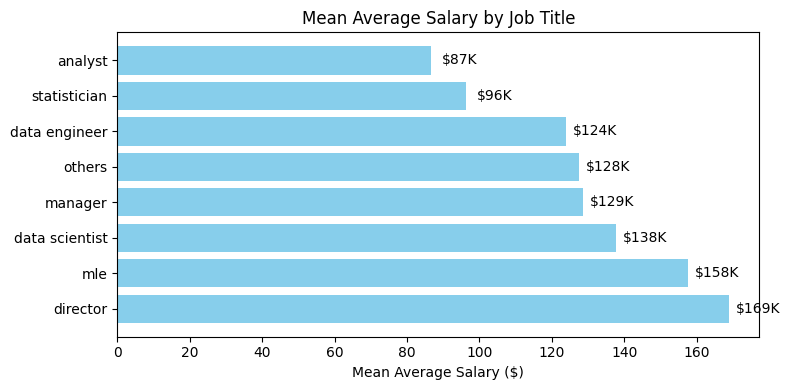

In [88]:
# Grouping data by Job Title to calculate the average salary
mean_salary_by_title = df.groupby('Title')['average_salary'].mean().sort_values(ascending=False).reset_index()


# Sorting the data by average salary for better visualization
average_salary_by_title_sorted = mean_salary_by_title.sort_values(by='average_salary')

# Creating the bar plot with mean average salary annotated on each bar
plt.figure(figsize=(8,4))
#bars = plt.barh(mean_salary_by_title['Title'], mean_salary_by_title['average_salary'], color='skyblue')
bars = plt.barh(average_salary_by_title_sorted['Title'], average_salary_by_title_sorted['average_salary'], color='skyblue')

# Annotating each bar with the mean average salary
for bar in bars:
    width = bar.get_width()
    plt.text(width + 8, bar.get_y() + bar.get_height()/2,
             f"${width:.0f}K", ha='center', va='center')

plt.title('Mean Average Salary by Job Title')
plt.xlabel('Mean Average Salary ($)')
plt.ylabel('')
plt.gca().invert_yaxis()  # To display the highest salaries at the top
plt.tight_layout()  # Adjust layout to make room for the annotations
plt.grid(False)
plt.show()


# Mean Data Practictioners Salaries Across States And Job Titles

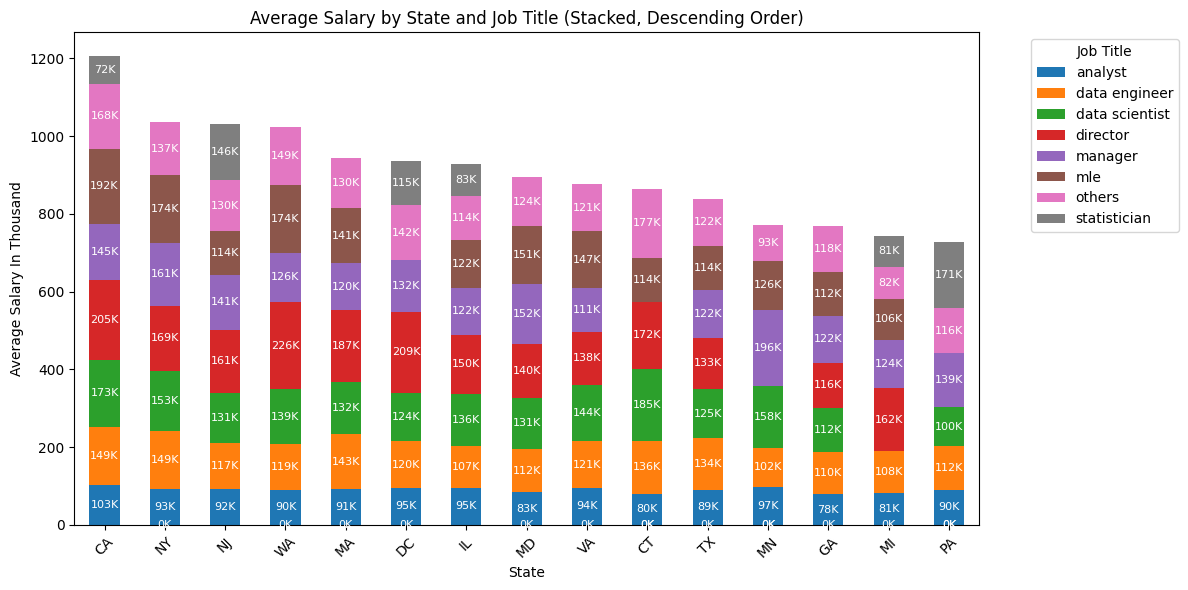

In [89]:

# Calculating average salary for each combination of state and job title
avg_salary = df.groupby(['State', 'Title'])['average_salary'].mean().reset_index()

# Pivoting the data for easier plotting
pivoted_data = avg_salary.pivot(index='State', columns='Title', values='average_salary').fillna(0)

# Adding a total salary by state for sorting
pivoted_data['Total'] = pivoted_data.sum(axis=1)
sorted_data = pivoted_data.sort_values('Total', ascending=False).drop(columns='Total')[0:15]

# Plotting
fig, ax = plt.subplots(figsize=(12,6))
sorted_data.plot(kind='bar', stacked=True, ax=ax)

# Adding labels (simplified; for detailed labels, iterate over bars)
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}K', (rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                ha='center', va='center', fontsize=8, color='white')

ax.set_title('Average Salary by State and Job Title (Stacked, Descending Order)')
ax.set_xlabel('State')
ax.set_ylabel('Average Salary In Thousand')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()


# Mean Data Practictioners Salaries Across States And Job Skill set

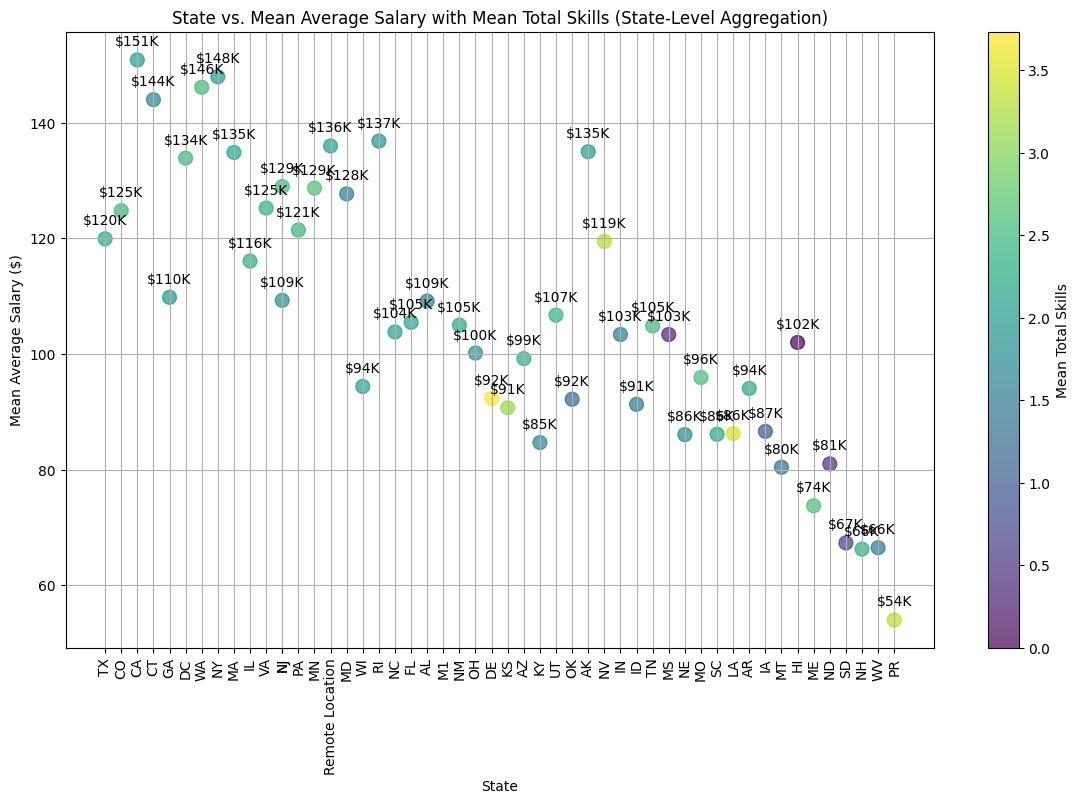

In [90]:
# Aggregating data by state and job title for mean average salary and mean total skills.
agg_data = df.groupby(['State', 'Title']).agg(
    mean_average_salary=('average_salary', 'mean'),
    mean_total_skills=('Total_skills', 'mean')
).reset_index()
state_mapping = {'TX': 0, 'CO': 1, 'CA': 2, 'CT': 3, 'GA': 4,'DC':5,'WA':6,'NY':7,'MA':8,'IL':9,'VA':10,'OR':11,'NJ':11,'PA':12,'MN':13,
                 'Remote Location':14,'MD':15,'WI':16,'RI':17,'NC':18,'FL':19,'AL':20,'M1':21,'NM':22,'OH':23,'DE':24,'KS':25,'AZ':26,'KY':27,'UT':28,'OK':29,'AK':30,'NV':31,'IN':32,'ID':33,
                 'TN':34,'MS':35,'NE':36,'MO':37,'SC':38,'LA':39,'AR':40,'IA':41,'MT':42,'HI':43,'ME':44,'ND':45,'SD':46,'NH':47,'WV':48,'PR':49}
# For simplicity and clarity, let's focus on the overall mean across all titles for now, as including all job titles clearly
# may not be feasible without cluttering the plot. We'll use this aggregated data to highlight state-level insights.
state_agg = agg_data.groupby('State').agg(
    mean_average_salary=('mean_average_salary', 'mean'),
    mean_total_skills=('mean_total_skills', 'mean')
).reset_index()

# Map states to numeric values for plotting
state_agg['State_numeric'] = state_agg['State'].map(state_mapping)

# Plotting
plt.figure(figsize=(14, 8))
scatter = plt.scatter(state_agg['State_numeric'], state_agg['mean_average_salary'],
                      alpha=0.7, c=state_agg['mean_total_skills'], cmap='viridis', s=100)

# Annotating each point with the mean average salary
for i, txt in enumerate(state_agg['mean_average_salary']):
    plt.annotate(f"${txt:.0f}K", (state_agg['State_numeric'].iloc[i], state_agg['mean_average_salary'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.title('State vs. Mean Average Salary with Mean Total Skills (State-Level Aggregation)')
plt.xlabel('State')
plt.ylabel('Mean Average Salary ($)')

# Replace numeric ticks with state labels
plt.xticks(ticks=list(state_mapping.values()), labels=list(state_mapping.keys()), rotation='vertical')
# Adding a colorbar to represent mean Total_skills
cbar = plt.colorbar(scatter)
cbar.set_label('Mean Total Skills')

plt.grid(True)
plt.show()


# Correlation Between Average Salary and Number of Technical Skills

In [91]:
correlation_salary_skill = df['average_salary'].corr(df['Total_skills'])

correlation_salary_skill

0.12470729602445327